In [1]:
# Final Project
# CS5890, Deep Learning
# Kian Arnold, A02267479
# Luke Arnold, A02368233
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_recall_fscore_support
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ALL COLUMNS:
# ---------------------------------------------------------------
# Id, MSSubClass, MSZoning, LotFrontage, LotArea,
# Street, Alley, LotShape, LandContour, Utilities,
# LotConfig, LandSlope, Neighborhood, Condition1,
# Condition2, BldgType, HouseStyle, OverallQual,
# OverallCond, YearBuilt, YearRemodAdd, RoofStyle,
# RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea,
# ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond,
# BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, 
# BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, 
# HeatingQC, CentralAir, Electrical, 1stFlrSF, 
# 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, 
# BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, 
# KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, 
# Fireplaces, FireplaceQu, GarageType, GarageYrBlt, 
# GarageFinish, GarageCars, GarageArea, GarageQual, 
# GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, 
# EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, 
# PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold,
# SaleType, SaleCondition, SalePrice
# ---------------------------------------------------------------
# HYPOTHESIZED COLUMNS MOST LIKELY TO AFFECT PRICE
# LotArea
# YearBuilt
# BsmtFullBath
# BsmtHalfBath
# FullBath
# HalfBath
# BedroomAbvGr

# read in dataframe
houses = pd.read_csv('data/train.csv', sep=',')

# get averages for features
one_bedroom = houses[houses['BedroomAbvGr'] == 1].SalePrice.mean()
two_bedroom = houses[houses['BedroomAbvGr'] == 2].SalePrice.mean()
three_bedroom = houses[houses['BedroomAbvGr'] == 3].SalePrice.mean()
four_bedroom = houses[houses['BedroomAbvGr'] == 4].SalePrice.mean()
five_bedroom = houses[houses['BedroomAbvGr'] == 5].SalePrice.mean()
display(f'  One Bedroom Avg -> {one_bedroom}')
display(f'  Two Bedroom Avg -> {two_bedroom}')
display(f'Three Bedroom Avg -> {three_bedroom}')
display(f' Four Bedroom Avg -> {four_bedroom}')
display(f' Five Bedroom Avg -> {five_bedroom}')
display('-----------------------------------------------')
lot_area_0 = houses[houses['LotArea'].between(0, 5000)].SalePrice.mean()
lot_area_1 = houses[houses['LotArea'].between(5000, 10000)].SalePrice.mean()
lot_area_2 = houses[houses['LotArea'].between(10000, 15000)].SalePrice.mean()
lot_area_3 = houses[houses['LotArea'].between(15000, 20000)].SalePrice.mean()
lot_area_4 = houses[houses['LotArea'].between(20000, 30000)].SalePrice.mean()
lot_area_5 = houses[houses['LotArea'].between(30000, 40000)].SalePrice.mean()
lot_area_6 = houses[houses['LotArea'].between(40000, 50000)].SalePrice.mean()
lot_area_7 = houses[houses['LotArea'].between(50000, 75000)].SalePrice.mean()
lot_area_8 = houses[houses['LotArea'].between(75000, 100000)].SalePrice.mean()
display(f' Lot Area (0,        5000) -> {lot_area_0}')
display(f' Lot Area (5000,   10,000) -> {lot_area_1}')
display(f' Lot Area (10,000, 15,000) -> {lot_area_2}')
display(f' Lot Area (15,000, 20,000) -> {lot_area_3}')
display(f' Lot Area (20,000, 30,000) -> {lot_area_4}')
display(f' Lot Area (30,000, 40,000) -> {lot_area_5}')
display(f' Lot Area (40,000, 50,000) -> {lot_area_6}')
display(f' Lot Area (50,000, 75,000) -> {lot_area_7}')
display(f' Lot Area (75,000, 100,000) -> {lot_area_8}')
display('-----------------------------------------------')
one_bathroom = houses[houses['FullBath'] == 1].SalePrice.mean()
two_bathroom = houses[houses['FullBath'] == 2].SalePrice.mean()
three_bathroom = houses[houses['FullBath'] == 3].SalePrice.mean()
four_bathroom = houses[houses['FullBath'] == 4].SalePrice.mean()
five_bathroom = houses[houses['FullBath'] == 5].SalePrice.mean()
display(f'  One Bathroom Avg -> {one_bathroom}')
display(f'  Two Bathroom Avg -> {two_bathroom}')
display(f'Three Bathroom Avg -> {three_bathroom}')
display(f' Four Bathroom Avg -> {four_bathroom}')
display(f' Five Bathroom Avg -> {five_bathroom}')
display('-----------------------------------------------')
year_built_0 = houses[houses['YearBuilt'].between(1800, 1900)].SalePrice.mean()
year_built_1 = houses[houses['YearBuilt'].between(1900, 1925)].SalePrice.mean()
year_built_2 = houses[houses['YearBuilt'].between(1925, 1950)].SalePrice.mean()
year_built_3 = houses[houses['YearBuilt'].between(1950, 1960)].SalePrice.mean()
year_built_4 = houses[houses['YearBuilt'].between(1960, 1970)].SalePrice.mean()
year_built_5 = houses[houses['YearBuilt'].between(1970, 1980)].SalePrice.mean()
year_built_6 = houses[houses['YearBuilt'].between(1980, 1990)].SalePrice.mean()
year_built_7 = houses[houses['YearBuilt'].between(1990, 2000)].SalePrice.mean()
year_built_8 = houses[houses['YearBuilt'].between(2000, 2010)].SalePrice.mean()
year_built_9 = houses[houses['YearBuilt'].between(2010, 2020)].SalePrice.mean()
display(f' Year Built (1800, 1900) -> {year_built_0}')
display(f' Year Built (1900, 1925) -> {year_built_1}')
display(f' Year Built (1925, 1950) -> {year_built_2}')
display(f' Year Built (1950, 1960) -> {year_built_3}')
display(f' Year Built (1960, 1970) -> {year_built_4}')
display(f' Year Built (1970, 1980) -> {year_built_5}')
display(f' Year Built (1980, 1990) -> {year_built_6}')
display(f' Year Built (1990, 2000) -> {year_built_7}')
display(f' Year Built (2000, 2010) -> {year_built_8}')
display(f' Year Built (2010, 2020) -> {year_built_9}')
display('-----------------------------------------------')
one_bathroom = houses[houses['HalfBath'] == 1].SalePrice.mean()
two_bathroom = houses[houses['HalfBath'] == 2].SalePrice.mean()
three_bathroom = houses[houses['HalfBath'] == 3].SalePrice.mean()
four_bathroom = houses[houses['HalfBath'] == 4].SalePrice.mean()
five_bathroom = houses[houses['HalfBath'] == 5].SalePrice.mean()
display(f'  One Bathroom Avg -> {one_bathroom}')
display(f'  Two Bathroom Avg -> {two_bathroom}')
display(f'Three Bathroom Avg -> {three_bathroom}')
display(f' Four Bathroom Avg -> {four_bathroom}')
display(f' Five Bathroom Avg -> {five_bathroom}')
display('-----------------------------------------------')

'  One Bedroom Avg -> 173162.42'

'  Two Bedroom Avg -> 158197.65921787708'

'Three Bedroom Avg -> 181056.87064676618'

' Four Bedroom Avg -> 220421.25352112675'

' Five Bedroom Avg -> 180819.04761904763'

'-----------------------------------------------'

' Lot Area (0,        5000) -> 143150.87074829932'

' Lot Area (5000,   10,000) -> 156124.32571428572'

' Lot Area (10,000, 15,000) -> 210462.3133732535'

' Lot Area (15,000, 20,000) -> 236546.78260869565'

' Lot Area (20,000, 30,000) -> 240566.74193548388'

' Lot Area (30,000, 40,000) -> 246478.0'

' Lot Area (40,000, 50,000) -> 275583.3333333333'

' Lot Area (50,000, 75,000) -> 288428.5714285714'

' Lot Area (75,000, 100,000) -> nan'

'-----------------------------------------------'

'  One Bathroom Avg -> 134751.44'

'  Two Bathroom Avg -> 213009.82552083334'

'Three Bathroom Avg -> 347822.9090909091'

' Four Bathroom Avg -> nan'

' Five Bathroom Avg -> nan'

'-----------------------------------------------'

' Year Built (1800, 1900) -> 153272.2'

' Year Built (1900, 1925) -> 126570.89795918367'

' Year Built (1925, 1950) -> 132169.484375'

' Year Built (1950, 1960) -> 142840.25543478262'

' Year Built (1960, 1970) -> 151536.49246231155'

' Year Built (1970, 1980) -> 153432.96464646465'

' Year Built (1980, 1990) -> 195143.56164383562'

' Year Built (1990, 2000) -> 226140.57754010695'

' Year Built (2000, 2010) -> 242439.162371134'

' Year Built (2010, 2020) -> 394432.0'

'-----------------------------------------------'

'  One Bathroom Avg -> 212721.96074766354'

'  Two Bathroom Avg -> 162028.91666666666'

'Three Bathroom Avg -> nan'

' Four Bathroom Avg -> nan'

' Five Bathroom Avg -> nan'

'-----------------------------------------------'

In [2]:
# get data usefulf or comparison 
display(f'House Price Mean   -> {houses.SalePrice.mean()}')
display(f'House Price Median -> {houses.SalePrice.median()}')
display(f'House Price Mode   -> {houses.SalePrice.mode()}')

# augment dataframe with binary classifiers for 'SalePrice' variable
house = houses[['LotArea', 'YearBuilt', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'SalePrice']]
house['price'] = np.where(house['SalePrice'] < house.SalePrice.median(), 0, 1) # collapse values in column

# standardize data
#house['LotArea'] = (house.LotArea - house.LotArea.mean()) / house.LotArea.std()
#house['YearBuilt'] = (house.YearBuilt - house.YearBuilt.mean()) / house.YearBuilt.std()
#house['BsmtFullBath'] = (house.BsmtFullBath - house.BsmtFullBath.mean()) / house.BsmtFullBath.std()
#house['BsmtHalfBath'] = (house.BsmtHalfBath - house.BsmtHalfBath.mean()) / house.BsmtHalfBath.std()
#house['FullBath'] = (house.FullBath - house.FullBath.mean()) / house.FullBath.std()
#house['HalfBath'] = (house.HalfBath - house.HalfBath.mean()) / house.HalfBath.std()
#house['BedroomAbvGr'] = (house.BedroomAbvGr - house.BedroomAbvGr.mean()) / house.BedroomAbvGr.std()

'House Price Mean   -> 180921.19589041095'

'House Price Median -> 163000.0'

'House Price Mode   -> 0    140000\nName: SalePrice, dtype: int64'

In [3]:
# perform knn
houseX = house[['LotArea','BsmtFullBath']].values
houseY = house[['price']].values

# do train test split 
X_train, X_test, y_train, y_test = train_test_split(houseX, houseY, test_size = 0.4)
nn = NearestNeighbors(n_neighbors=5, metric='euclidean', algorithm='auto')
fit = nn.fit(houseX)
distances, indices = fit.kneighbors(houseX)

# do predictions
y_pred = []
for i in range(len(houseX)):
    nbrs = house.iloc[indices[i]]
    nbrs = nbrs.drop(house.index[i], errors='ignore')
    cheap = nbrs[nbrs.price == 0].count().price
    expensive = nbrs[nbrs.price == 1].count().price
    predict = 0 if (expensive > cheap) else 1
    y_pred.append(predict)   

# display results
(p, r, f, s) = precision_recall_fscore_support(houseY, y_pred, labels=[1])
display(f'Precision -> {p[0]}')
display(f'   Recall -> {r[0]}')
display(f'       F1 -> {f[0]}')

# LOT AREA
# Precision -> 0.4018 
#    Recall -> 0.4973
#        F1 -> 0.4444
#
# YEAR BUILT
# Precision -> 0.2428
#    Recall -> 0.2650 
#        F1 -> 0.2534 
#
# BASEMENT FULL BATH
# Precision -> 0.4503
#    Recall -> 0.5383
#        F1 -> 0.4904
#
# BASEMENT HALF BATH 
# Precision -> 0.8750
#    Recall -> 0.0096 
#        F1 -> 0.0189   
#
# FULL BATH
# Precision -> 0.1562 
#    Recall -> 0.1393 
#        F1 -> 0.1473
#
# HALF BATH          
# Precision -> 1.0
#    Recall -> 0.0123
#        F1 -> 0.0243
#
# BEDROOMS 

'Precision -> 0.3951965065502183'

'   Recall -> 0.49453551912568305'

'       F1 -> 0.4393203883495146'

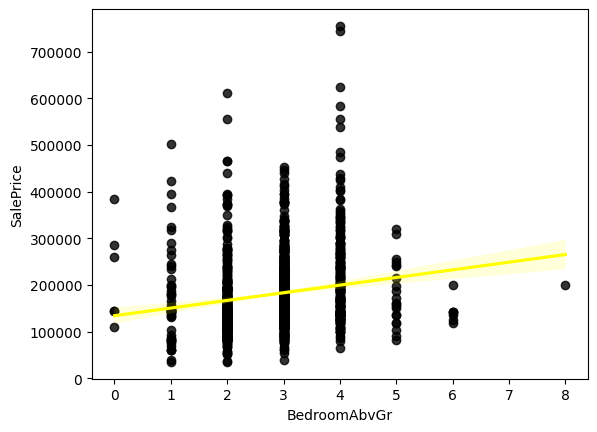

In [6]:
# use linear regression to detect correlation between saleprice and variable
#plot0 = sns.regplot(x='LotArea', y='SalePrice', data=house, scatter_kws={"color": "black"}, line_kws={"color": "yellow"})
#plot1 = sns.regplot(x='YearBuilt', y='SalePrice', data=house, scatter_kws={"color": "black"}, line_kws={"color": "yellow"})
#plot2 = sns.regplot(x='BsmtFullBath', y='SalePrice', data=house, scatter_kws={"color": "black"}, line_kws={"color": "black"})
#plot3 = sns.regplot(x='BsmtHalfBath', y='SalePrice', data=house, scatter_kws={"color": "black"}, line_kws={"color": "black"})
#plot4 = sns.regplot(x='FullBath', y='SalePrice', data=house, scatter_kws={"color": "black"}, line_kws={"color": "yellow"})
#plot5 = sns.regplot(x='HalfBath', y='SalePrice', data=house, scatter_kws={"color": "black"}, line_kws={"color": "black"})
plot5 = sns.regplot(x='BedroomAbvGr', y='SalePrice', data=house, scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

In [5]:
# attempt to use multiple linear regression for predictive pricing
#
#           Lot Size -> 5,000 f^2 / $20,000 = $4 per square foot
#         Year Built -> 10 yr / $12,000     = $1,200 per year after 1900
# Bedroom Above Grnd -> 1 / $30,000         = $30,000 per bedroom 
# Basement Full Bath -> 
#          Full Bath -> 1 / $70,000         = $70,000 per full bathroom

house = houses[['OverallCond', 'LotArea', 'YearBuilt', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'SalePrice']]

house['predict'] = 13250
house['predict'] = house.predict + (house.LotArea * 3)
house['predict'] = house.predict + (house.OverallCond * 500)
house['predict'] = house.predict + ((house.YearBuilt - 1900) * 500)
house['predict'] = house.predict + (house.BsmtFullBath * 5000)
house['predict'] = house.predict + (house.BsmtHalfBath * -16000)
house['predict'] = house.predict + (house.FullBath * 50000)
house['predict'] = house.predict + (house.HalfBath * 10000)
house['predict'] = house.predict + (house.BedroomAbvGr * 5000)

# determine closeness
house['dif'] = house.SalePrice - house.predict
display(house.dif.mean())
display(abs(house.dif).sum())


display(house)
#display(max(house.dif))

78.58835616438355

56449859

,OverallCond,LotArea,YearBuilt,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice,predict,dif
0,5,8450,2003,1,0,2,1,3,208500,222600,-14100
1,8,9600,1976,0,1,2,0,3,181500,183050,-1550
2,5,11250,2001,1,0,2,1,3,223500,230000,-6500
3,5,9550,1915,1,0,1,0,3,140000,121900,18100
4,5,14260,2000,1,0,2,1,4,250000,243530,6470
...,...,...,...,...,...,...,...,...,...,...,...
1455,5,7917,1999,0,0,2,1,3,175000,214001,-39001
1456,6,13175,1978,1,0,2,0,3,210000,214775,-4775
1457,9,9042,1941,0,0,2,0,4,266500,185376,81124
1458,6,9717,1950,1,0,1,0,2,142125,135401,6724
